In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import matplotlib as mpl
register_matplotlib_converters()
%matplotlib inline 

In [15]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv')
df.set_index('date', inplace=True)
df.index.name = None
df.head()

,value
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [21]:
# Clean data
df = df[(df['value'] >= df['value'].quantile(0.025)) & 
(df['value'] <= df['value'].quantile(0.975))]
#still needs cleaning?!

In [16]:
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


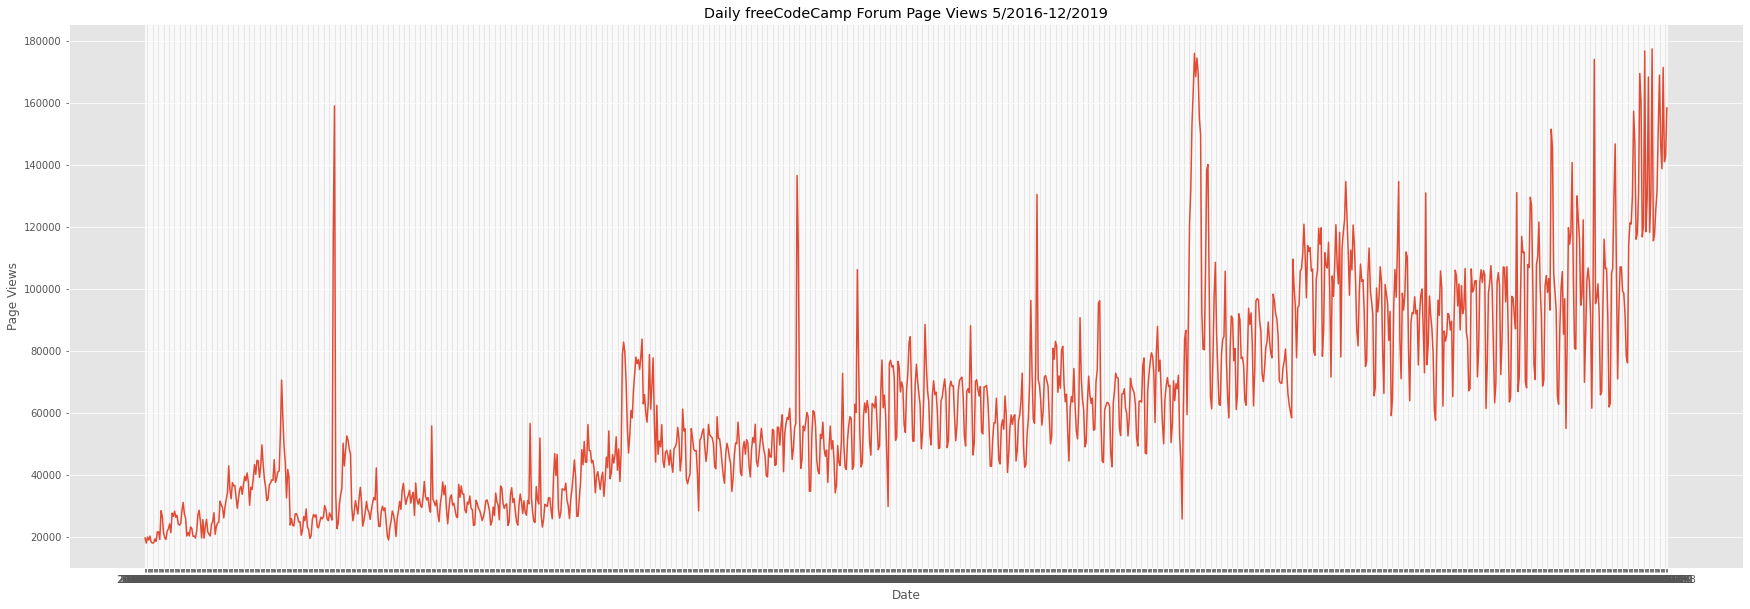

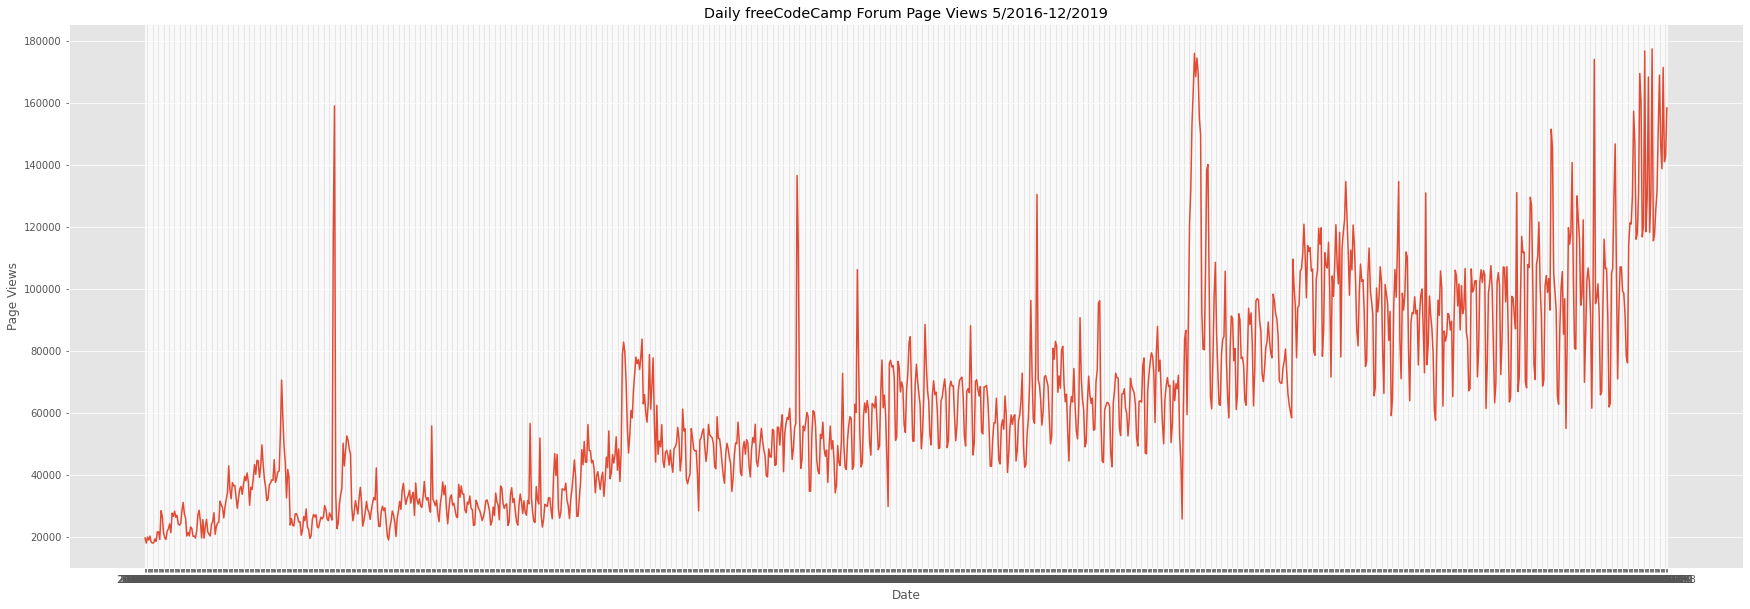

In [24]:
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(30,10))
    plt.plot(df.index, df['value'])
    plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    plt.xlabel("Date")
    plt.ylabel("Page Views")

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig
draw_line_plot()

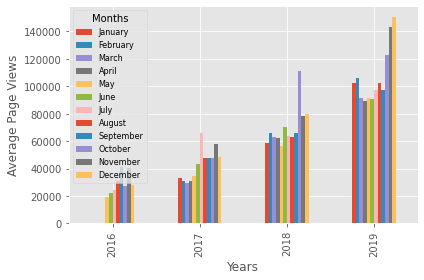

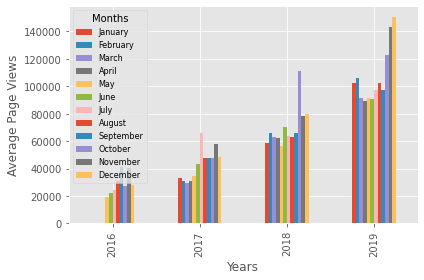

In [25]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['year'] = pd.DatetimeIndex(df_bar.index).year
    df_bar['month'] = pd.DatetimeIndex(df_bar.index).month

    df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack() 

    # Draw bar plot
    # Month names for plotting legend
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    fig = df_bar.plot.bar()
    fig.legend(months, title='Months', prop={'size': 8})
    plt.xlabel("Years")
    plt.ylabel("Average Page Views")
    plt.tight_layout()
    fig = fig.figure

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig
draw_bar_plot()

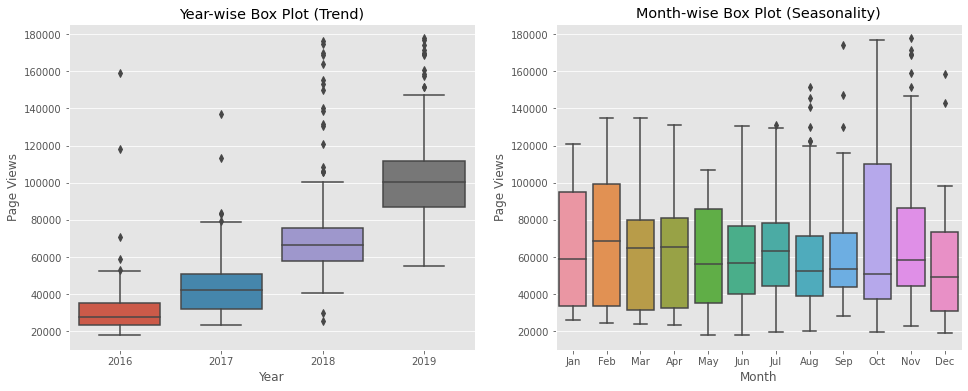

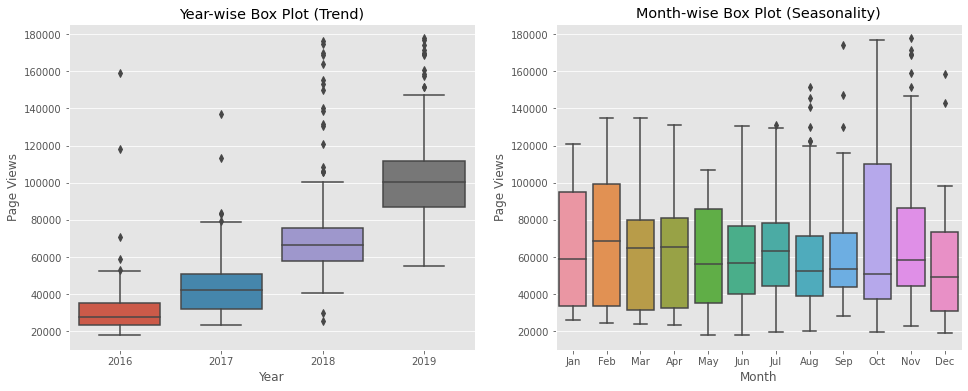

In [32]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv", index_col="date" , parse_dates=True)

# Clean data
df = df[ df["value"].between( df["value"].quantile(.025), df["value"].quantile(.975) ) ]
months= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    df_box['monthnumber'] = df.index.month
    df_box = df_box.sort_values('monthnumber')
    fig, ax = plt.subplots(1,2,figsize=(16,6))
    sns.boxplot(y = "value", x = "year", data = df_box, ax = ax[0] ) 
    ax[0].set(xlabel="Year", ylabel="Page Views", title="Year-wise Box Plot (Trend)")
    sns.boxplot(y = "value", x = "month", data = df_box, ax = ax[1])
    ax[1].set(xlabel="Month", ylabel="Page Views", title="Month-wise Box Plot (Seasonality)")
    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig
draw_box_plot()